<a href="https://colab.research.google.com/github/rmvsaipavan/manivenkatasaipavan_INFO5731_Fall2023/blob/main/Ramisetty_Manivenkatasaipavan_Assignment_three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [ ]:
import pandas as pd
from nltk import ngrams, FreqDist, pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.chunk import RegexpParser

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
dataset_path = 'imdb_reviews.csv'
df = pd.read_csv(dataset_path)

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    return [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Create a list of tokenized reviews
tokenized_reviews = df['Review Content'].apply(preprocess_text)

# Function to calculate N-gram frequencies
def calculate_ngram_frequencies(texts, n):
    ngram_freq = FreqDist()
    for text in texts:
        ngrams_list = list(ngrams(text, n))
        ngram_freq.update(ngrams_list)
    return ngram_freq

# Task 1: Count the frequency of all the N-grams (N=3)
trigram_freq = calculate_ngram_frequencies(tokenized_reviews, 3)
print("Task 1: Trigram frequencies")
print(trigram_freq)

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(texts):
    bigram_freq = FreqDist()
    unigram_freq = FreqDist()

    for text in texts:
        bigrams_list = list(ngrams(text, 2))
        unigrams_list = list(ngrams(text, 1))

        bigram_freq.update(bigrams_list)
        unigram_freq.update(unigrams_list)

    # Calculate probabilities
    bigram_probabilities = {bigram: bigram_freq[bigram] / unigram_freq[(bigram[0],)] for bigram in bigram_freq}

    return bigram_probabilities

# Task 2: Calculate the probabilities for all the bigrams in the dataset
bigram_probabilities = calculate_bigram_probabilities(tokenized_reviews)
print("\nTask 2: Bigram Probabilities")
print(bigram_probabilities)

# Function to extract noun phrases using chunking
def extract_noun_phrases(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)

    grammar = r"""
        NP: {<DT>?<JJ>*<NN>}   # NP
        {<NNP>+}               # Chunk consecutive proper nouns
    """
    chunk_parser = RegexpParser(grammar)
    tree = chunk_parser.parse(tagged_words)

    noun_phrases = []
    for subtree in tree.subtrees(filter=lambda t: t.label() == 'NP'):
        noun_phrases.append(' '.join(word for word, tag in subtree.leaves()))

    return noun_phrases

# Task 3: Extract all the noun phrases and calculate relative probabilities
all_noun_phrases = []
for review in df['Review Content']:
    noun_phrases = extract_noun_phrases(review)
    all_noun_phrases.extend(noun_phrases)

# Calculate frequency of each noun phrase
noun_phrase_freq = FreqDist(all_noun_phrases)

# Calculate relative probabilities
relative_probabilities = {noun_phrase: noun_phrase_freq[noun_phrase] / noun_phrase_freq.most_common(1)[0][1]
                          for noun_phrase in noun_phrase_freq}

# Print the result in a table
print("\nTask 3: Relative Probabilities of Noun Phrases")
noun_phrase_df = pd.DataFrame(columns=relative_probabilities.keys(), index=df['Review Title'])
for i, review_title in enumerate(df['Review Title']):
    review_noun_phrases = extract_noun_phrases(df['Review Content'][i])
    for noun_phrase in relative_probabilities.keys():
        noun_phrase_df.at[review_title, noun_phrase] = review_noun_phrases.count(noun_phrase) / len(review_noun_phrases)

print(noun_phrase_df)


[nltk_data] Downloading package punkt to C:\Users\Sai
[nltk_data]     Pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sai
[nltk_data]     Pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Task 1: Trigram frequencies
<FreqDist with 4475 samples and 1802000 outcomes>

Task 2: Bigram Probabilities
{('christopher', 'nolan'): 1.0, ('cillian', 'murphy'): 1.0, ('emily', 'blunt'): 0.9, ('robert', 'downey'): 0.5, ('robert', 'oppenheimer'): 0.5, ('atomic', 'bomb'): 0.6363636363636364, ('downey', 'jr'): 0.5384615384615384, ('manhattan', 'project'): 0.7777777777777778, ('one', 'best'): 0.1320754716981132, ('matt', 'damon'): 1.0, ('one', 'scene'): 0.11320754716981132, ('florence', 'pugh'): 1.0, ('sound', 'design'): 0.38461538461538464, ('los', 'alamos'): 1.0, ('good', 'movie'): 0.3125, ('hiroshima', 'nagasaki'): 0.625, ('run', 'time'): 1.0, ('feel', 'like'): 0.23529411764705882, ('three', 'hours'): 0.5714285714285714, ('dark', 'knight'): 1.0, ('inception', 'interstellar'): 0.8, ('blunt', 'florence'): 0.36363636363636365, ('tell', 'story'): 0.5, ('nolan', 'film'): 0.05333333333333334, ('nolan', 'films'): 0.05333333333333334, ('unsatisfying', 'film'): 1.0, ('oppenheimer', 'life'): 0.0


Task 3: Relative Probabilities of Noun Phrases
                                                   Oppenheimer     Nolan  \
Review Title                                                               
Murphy is exceptional                                 0.041667       0.0   
A challenging watch to be sure, but a worthwhil...    0.076923       0.0   
A brilliantly layered examination of a man thro...    0.054131  0.019943   
Nolan delivers a powerfull biopic that shows th...    0.033333  0.033333   
Nolan touches greatness, falls slightly short         0.047059  0.035294   
...                                                        ...       ...   
Quality but exhausting                                     0.0  0.086957   
Simply amazing                                             0.0       0.0   
I Wish I Could Say I Had A Blast                      0.061644  0.075342   
Disappointing                                              0.0       0.0   
Overlong and Overcomplicated            

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
dataset_path = 'imdb_reviews.csv'
df = pd.read_csv(dataset_path)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Review Content'])

# Function to calculate cosine similarity
def calculate_cosine_similarity(query_vector, document_matrix):
    return cosine_similarity(query_vector, document_matrix)[0]

# Design a query
query = "An Outstanding movie with a haunting performance and best character development"

# Transform the query into a TF-IDF vector
query_vector = tfidf_vectorizer.transform([query])

# Calculate cosine similarity between the query and documents
cosine_similarities = calculate_cosine_similarity(query_vector, tfidf_matrix)

# Rank the documents based on cosine similarity
ranked_documents = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)

# Print the ranked documents
print("Ranking of Documents with Respect to the Query:")
for rank, (index, similarity) in enumerate(ranked_documents, 1):
    print(f"Rank {rank}: Document {index + 1} - Similarity: {similarity:.4f}")
    print(f"   {df['Review Content'][index]}")
    print("\n" + "="*50 + "\n")





Ranking of Documents with Respect to the Query:
Rank 1: Document 16 - Similarity: 0.1200
   Anything that Nolan is involved in, I will go and see, the track record is enough to get me through the doors and on that seat.Oppenheimer represented something of a challenge to me the first time round, after a busy day at work, I went to see it, and at three hours long, after Barbie, it was too much, last night I watched it properly for the second time.As a casual viewer, it's a tough one, but if you're engaged and prepared, this is one outstanding movie. I am on no doubt whatsoever that this film will do very well in terms of awards, the whole cinema was totally immersed, the room was silent.The pacing builds as the film progresses, the second half was the best part, and I loved the ending.It gives some fascinating insight into the life and times of J. Robert Oppenheimer, most of which I knew nothing about, he's a genius, but like all of us, flawed.Cillian Murphy delivers an outstanding, awar

Rank 802: Document 47 - Similarity: 0.0957
   This movie is very interesting and very thrilling. Since this movie had no action and was mostly just a documentary and was 3 hours long, I though that it was going to be boring. But, the 3 hours went by very fast and had me at the edge of my seat the whole time. This movie is like no other movie I had ever seen it is very unique and mind blowing. The cinematography is beautiful and the aesthetic of the movie is also beautiful. Anyone who is interested in the history of war and bombs would love this movie but I think anyone would enjoy this movie. Oppenheimer is one of the best movies I have seen this decade.


Rank 803: Document 72 - Similarity: 0.0957
   This movie is very interesting and very thrilling. Since this movie had no action and was mostly just a documentary and was 3 hours long, I though that it was going to be boring. But, the 3 hours went by very fast and had me at the edge of my seat the whole time. This movie is like no oth

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
pip install gensim


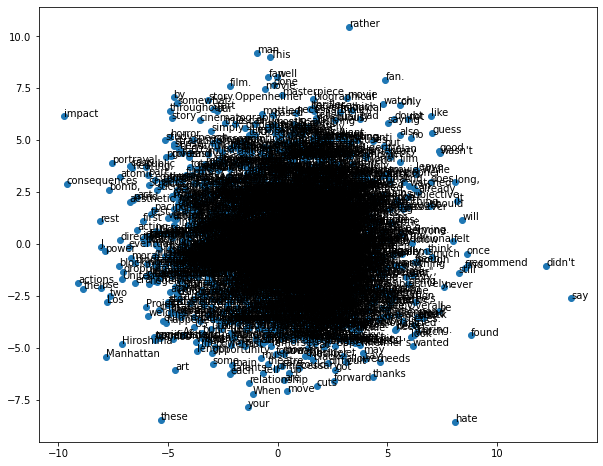

In [ ]:
# Write your code here

import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'imdb_reviews.csv'
df = pd.read_csv(dataset_path)

# Tokenize the sentences into words
tokenized_reviews = [sentence.split() for sentence in df['Review Content']]

# Train Word2Vec model
embedding_size = 300
window_size = 5
min_word_count = 1
workers = 4

word2vec_model = Word2Vec(sentences=tokenized_reviews,
                          vector_size=embedding_size,
                          window=window_size,
                          min_count=min_word_count,
                          workers=workers)

# Save the trained model (optional)
word2vec_model.save("word2vec_model.bin")

# Load the saved model (if needed)
# word2vec_model = Word2Vec.load("word2vec_model.bin")

# Visualize the Word Embeddings using PCA
def plot_words(embeddings, words):
    # Fit a PCA model to the word vectors
    pca = PCA(n_components=2)
    result = pca.fit_transform(embeddings)

    # Create a scatter plot of the projection
    plt.figure(figsize=(10, 8))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()

# Extract vectors and words
vectors = word2vec_model.wv.vectors
words = word2vec_model.wv.index_to_key

# Visualize the Word Embeddings using PCA
plot_words(vectors, words)






# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file



# Link: https://github.com/rmvsaipavan/manivenkatasaipavan_INFO5731_Fall2023/blob/main/annotated_reviews.csv



